<a href="https://colab.research.google.com/github/akhilapidugu99/MusicGenreClassification/blob/main/MusicGenreClassification_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
#path to json
DATA_PATH = "/content/drive/MyDrive/genres/data_10.json"

In [ ]:
def load_data(data_path):

  with open(data_path,"r") as f:
    data=json.load(f)

  #convert lists to many arrays
  x = np.array(data["mfcc"])
  y = np.array(data["labels"])

  print("Data successfully loaded")

  return x,y

In [ ]:
#load data
x,y =load_data(DATA_PATH)

Data successfully loaded


In [ ]:
x.shape

(9986, 130, 13)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **SIMPLE ANN**

In [ ]:
#build network topology
model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(x.shape[1],x.shape[2])),

        #1st dense layer
        keras.layers.Dense(512,activation='relu'),

        #2nd dense layer
        keras.layers.Dense(256,activation='relu'),

        #3r dense layer
        keras.layers.Dense(64,activation='relu'),

        #output layer
        keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
219/219 [==============================] - 3s 13ms/step - loss: 2.8694 - accuracy: 0.4448 - val_loss: 3.0558 - val_accuracy: 0.4072
Epoch 2/50
219/219 [==============================] - 3s 12ms/step - loss: 2.1729 - accuracy: 0.5007 - val_loss: 2.5244 - val_accuracy: 0.4413
Epoch 3/50
219/219 [==============================] - 3s 12ms/step - loss: 1.6793 - accuracy: 0.5637 - val_loss: 2.4996 - val_accuracy: 0.4503
Epoch 4/50
219/219 [==============================] - 3s 12ms/step - loss: 1.4208 - accuracy: 0.6009 - val_loss: 2.2669 - val_accuracy: 0.4897
Epoch 5/50
219/219 [==============================] - 2s 11ms/step - loss: 1.1781 - accuracy: 0.6498 - val_loss: 2.4107 - val_accuracy: 0.4656
Epoch 6/50
219/219 [==============================] - 2s 11ms/step - loss: 0.9721 - accuracy: 0.6996 - val_loss: 2.3562 - val_accuracy: 0.4900
Epoch 7/50
219/219 [==============================] - 2s 10ms/step - loss: 0.8952 - accuracy: 0.7196 - val_loss: 2.1977 - val_accuracy: 0.5000

In [ ]:
model.save("Ann")

INFO:tensorflow:Assets written to: Ann/assets


In [ ]:
def plot_history(history):
  fig,axs=plt.subplots(2)

  #create accuracy subplots
  axs[0].plot(history.history['accuracy'],label="train accuracy")
  axs[0].plot(history.history['val_accuracy'],label="train accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")

  #create error subplot
  axs[1].plot(history.history['loss'],label="train error")
  axs[1].plot(history.history['val_loss'],label="train error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")

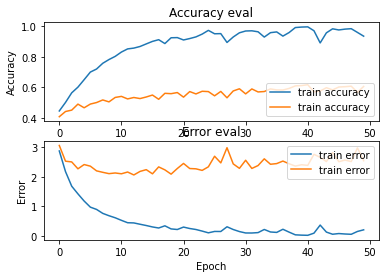

In [ ]:
plot_history(history)

# **MANAGING OVERFITTING**

> Indented block



In [ ]:
#build network topology
model_regularized= keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(x.shape[1],x.shape[2])),

        #1st dense layer
        keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #2nd dense layer
        keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #3r dense layer
        keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #output layer
        keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train model
history = model_regularized.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
219/219 [==============================] - 4s 14ms/step - loss: 39.0824 - accuracy: 0.1340 - val_loss: 3.4588 - val_accuracy: 0.1582
Epoch 2/50
219/219 [==============================] - 3s 12ms/step - loss: 7.0238 - accuracy: 0.1544 - val_loss: 3.4796 - val_accuracy: 0.1262
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 4.5276 - accuracy: 0.1467 - val_loss: 3.4840 - val_accuracy: 0.1225
Epoch 4/50
219/219 [==============================] - 3s 12ms/step - loss: 3.9763 - accuracy: 0.1338 - val_loss: 3.4777 - val_accuracy: 0.1228
Epoch 5/50
219/219 [==============================] - 3s 12ms/step - loss: 3.7335 - accuracy: 0.1355 - val_loss: 3.4672 - val_accuracy: 0.1252
Epoch 6/50
219/219 [==============================] - 3s 12ms/step - loss: 3.6807 - accuracy: 0.1374 - val_loss: 3.4530 - val_accuracy: 0.1312
Epoch 7/50
219/219 [==============================] - 3s 13ms/step - loss: 3.5791 - accuracy: 0.1460 - val_loss: 3.4579 - val_accuracy: 0.127

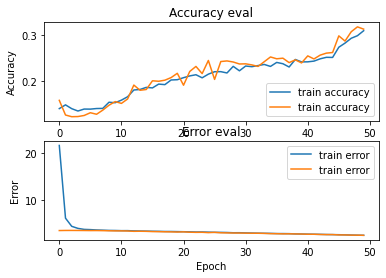

In [ ]:
plot_history(history)

## **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
#create train/test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train, test_size=0.2)

#add an axis to input sets
x_train =x_train[...,np.newaxis]
x_validation = x_validation[...,np.newaxis]
x_test=x_test[...,np.newaxis]

In [ ]:
x_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (x_train.shape[1], x_train.shape[2],1)

In [ ]:
#build the CNN
model_cnn = keras.Sequential()

#1st conv layer
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#2nd conv layer
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#3rd conv layer
model_cnn.add(keras.layers.Conv2D(32,(2,2),activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64,activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

#output layer
model_cnn.add(keras.layers.Dense(10,activation='softmax'))


In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)        

In [ ]:
#train model
history = model_cnn.fit(x_train,y_train,validation_data=(x_validation,y_validation),batch_size=32,epochs=50)

Epoch 1/50
188/188 [==============================] - 11s 53ms/step - loss: 2.7042 - accuracy: 0.1660 - val_loss: 1.9199 - val_accuracy: 0.3298
Epoch 2/50
188/188 [==============================] - 10s 52ms/step - loss: 1.9307 - accuracy: 0.3520 - val_loss: 1.5411 - val_accuracy: 0.4773
Epoch 3/50
188/188 [==============================] - 10s 52ms/step - loss: 1.6672 - accuracy: 0.4180 - val_loss: 1.3843 - val_accuracy: 0.5207
Epoch 4/50
188/188 [==============================] - 10s 52ms/step - loss: 1.5312 - accuracy: 0.4535 - val_loss: 1.3113 - val_accuracy: 0.5381
Epoch 5/50
188/188 [==============================] - 10s 52ms/step - loss: 1.4620 - accuracy: 0.4831 - val_loss: 1.2382 - val_accuracy: 0.5494
Epoch 6/50
188/188 [==============================] - 10s 53ms/step - loss: 1.3751 - accuracy: 0.5207 - val_loss: 1.1841 - val_accuracy: 0.5841
Epoch 7/50
188/188 [==============================] - 10s 52ms/step - loss: 1.2771 - accuracy: 0.5370 - val_loss: 1.1342 - val_accuracy:

In [ ]:
model.save("CNN")

INFO:tensorflow:Assets written to: CNN/assets


In [ ]:
x_to_predict = x_test[0][np.newaxis, ...]
model.predict(x_to_predict)

array([[8.8344400e-30, 4.7781663e-37, 1.3749561e-20, 3.8922604e-22,
        1.0000000e+00, 2.3276132e-18, 2.1373742e-24, 1.2589260e-15,
        1.0775703e-19, 5.2112241e-21]], dtype=float32)

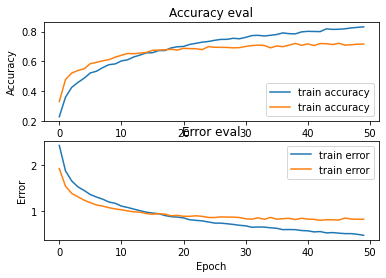

In [ ]:
#plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
#evaluate model on Test set
test_loss,test_acc=model_cnn.evaluate(x_test,y_test,verbose=2)
print('\n Test Accuracy:',test_acc)

79/79 - 1s - loss: 0.7688 - accuracy: 0.7381

 Test Accuracy: 0.7380856871604919


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN/assets


In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [ ]:
#It can be used to reconstruct the model identically
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

# **Prediction On Test Set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pick a sample to predict from the test set
x_to_predict = x_test[100]
y_to_predict = y_test[100] 

In [ ]:
x_to_predict.shape

(130, 13, 1)

In [ ]:
print("Real Genre:",y_to_predict)

Real Genre: 1


In [ ]:
#add a dimension to input data for sample , model.pedict() expects a 4d array in this case
x_to_predict = x_to_predict[np.newaxis, ...] #array hape(1,130,13,1)

In [ ]:
x_to_predict.shape

(1, 130, 13, 1)

In [ ]:
#perform prediction
prediction = model_cnn.predict(x_to_predict)

In [ ]:
#get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:",int(predicted_index))

Predicted Genre: 1


In [ ]:
#pick a sample to predict from the test set
x_to_predict = x_test[50]
y_to_predict = y_test[50] 

print("Real Genre:",y_to_predict)

x_to_predict = x_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:",int(predicted_index))


Real Genre: 5
Predicted Genre: 5


In [ ]:
len(x_test)

2497

In [ ]:
for n in range(10):
  
  i=random.randint(0,len(x_test))
  #pick a sample to predict from the test set
  x_to_predict = x_test[i]
  y_to_predict = y_test[i] 

  print("Real Genre:",y_to_predict)

  x_to_predict = x_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(x_to_predict)

  #get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:",int(predicted_index))


Real Genre: 3
Predicted Genre: 6
Real Genre: 7
Predicted Genre: 7
Real Genre: 0
Predicted Genre: 0
Real Genre: 7
Predicted Genre: 7
Real Genre: 0
Predicted Genre: 6
Real Genre: 3
Predicted Genre: 3
Real Genre: 4
Predicted Genre: 7
Real Genre: 5
Predicted Genre: 5
Real Genre: 7
Predicted Genre: 3
Real Genre: 0
Predicted Genre: 4


# **Prediction On New Songs**

In [ ]:
#Audio files pre-processing
def process_input(audio_file,track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FFT=2048
  HOP_LENGTH=512
  TRACK_DURATION=track_duration #measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS=10

  samples_per_segment = int(SAMPLES_PER_TRACK/NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/HOP_LENGTH)

  signal, sample_rate=librosa.load(audio_file,sr=SAMPLE_RATE)
  
  for d in range(10):

    #calculate start and finish sample for current segemnt
    start = samples_per_segment *d
    finish = start+samples_per_segment

    #extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft= N_FFT,hop_length=HOP_LENGTH)
    mfcc =mfcc.T

    return mfcc

In [ ]:
genre_dict ={0:"blues",1:"classical",2:"country",3:"disco",4:"hiphop",5:"jazz",6:"metal",7:"pop",8:"reggae",9:"rock"}

In [ ]:
new_input_mfcc = process_input("/content/Dee Yan-Key - Carousel Ride.mp3",30)

In [ ]:
type(new_input_mfcc)

In [ ]:
new_input_mfcc.shape

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis, ...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/Filmy Ghost (Sábila Orbe) - KD6-3.7.mp3",30)

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis,...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/Lobo Loco - Home W (ID 1550).mp3",30)

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis,...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/genres/reggae/reggae.00004.wav",30)

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis,...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/rock.00007.wav",30)

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis,...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/genres/pop/pop.00001.wav",30)

In [ ]:
x_to_predict=new_input_mfcc[np.newaxis,...,np.newaxis]
x_to_predict.shape

In [ ]:
prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)


print("Predicted Genre:",genre_dict[int(predicted_index)])